# **CIS 520: Machine Learning, Fall 2020**
# **Week 4, Worksheet 1**
## **Regression Penalties**


- **Content Creators:** Yang Yan
- **Content Reviewers:** Lyle Ungar, Yide Zhao

The objective of this notebook is to help you understand:
 
*   Differences between Lasso, Ridge and Elastic Net regressions.
*   How to implement above regressions in sklearn
*   Basic matplotlib skills for model visualization

## Lasso Regression
On [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) \
One key difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are completely neglected (see left graph).

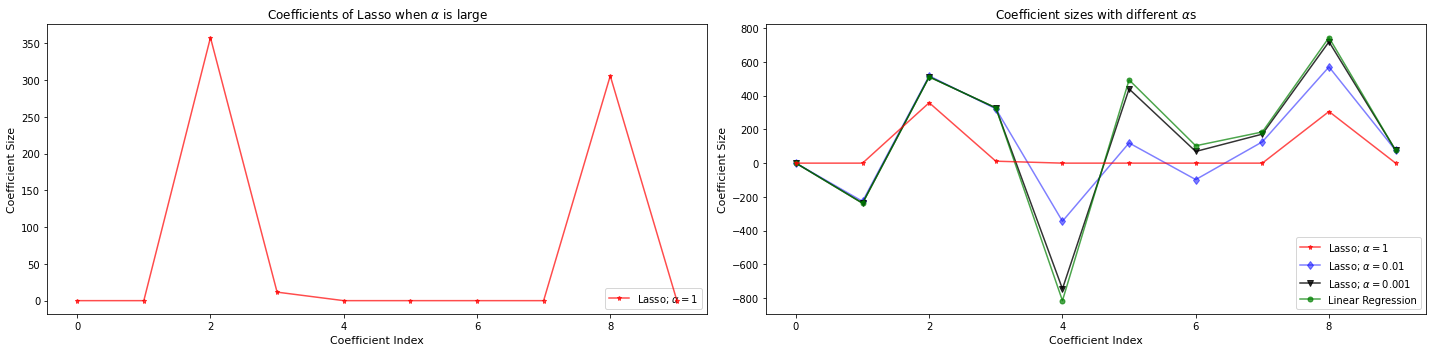

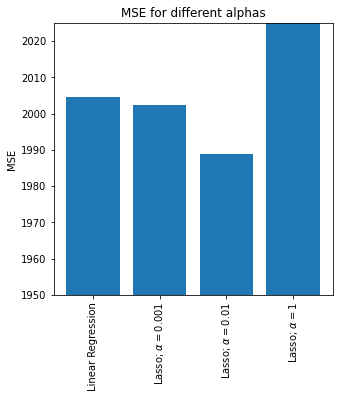

In [ ]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

# Split the data into training/testing sets
X_train = diabetes_X[:-20,:]
X_test = diabetes_X[-20:,:]

# Split the targets into training/testing sets
y_train = diabetes_y[:-20]
y_test = diabetes_y[-20:]

# test different lambda values
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
test_score=mean_squared_error(y_test,y_pred)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
y_pred = lasso001.predict(X_test)
test_score001=mean_squared_error(y_test,y_pred)

lasso0001 = Lasso(alpha=0.001, max_iter=10e5)
lasso0001.fit(X_train,y_train)
y_pred = lasso0001.predict(X_test)
test_score0001=mean_squared_error(y_test,y_pred)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr_test_score=mean_squared_error(y_test,y_pred)

plt.rcParams["figure.figsize"] = (20,5)
plt.subplot(1,2,1)
plt.plot(range(10),lasso.coef_,alpha=0.7,marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7)
plt.xlabel('Coefficient Index',fontsize=11)
plt.ylabel('Coefficient Size',fontsize=11)
plt.title(r'Coefficients of Lasso when $\alpha$ is large')
plt.legend(fontsize=10,loc=4)

plt.subplot(1,2,2)
plt.plot(range(10),lasso.coef_,alpha=0.7,marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7)
plt.plot(range(10),lasso001.coef_,alpha=0.5,marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')
plt.plot(range(10),lasso0001.coef_,alpha=0.8,marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.001$')
plt.plot(range(10),lr.coef_,alpha=0.7,marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=11)
plt.ylabel('Coefficient Size',fontsize=11)
plt.legend(fontsize=10,loc=4)
plt.title(r"Coefficient sizes with different $\alpha$s")
plt.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = (5,5)
plt.bar(range(4), (lr_test_score, test_score0001, test_score001, test_score))
plt.title("MSE for different alphas")
plt.ylabel("MSE")
plt.xticks(range(4), ('Linear Regression', r'Lasso; $\alpha = 0.001$', r'Lasso; $\alpha = 0.01$', r'Lasso; $\alpha = 1$'), rotation='vertical')
plt.ylim([1950,2025])
plt.show()



## Ridge Regression

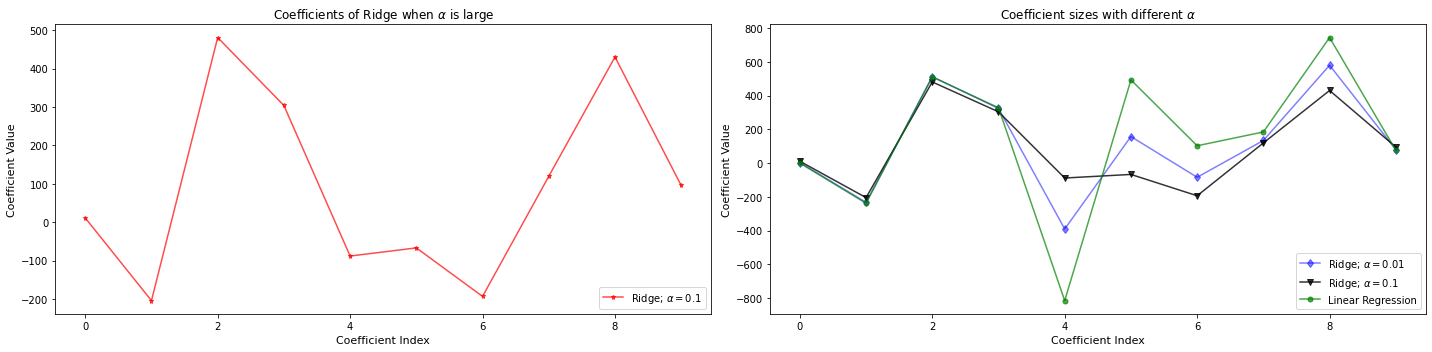

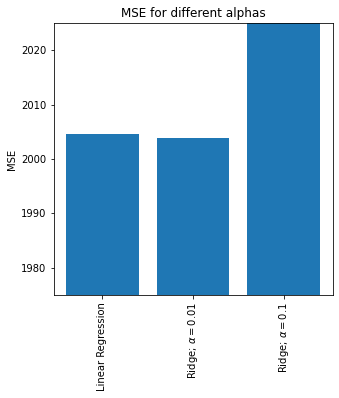

In [ ]:
from sklearn.linear_model import Ridge

ridge001 = Ridge(alpha=0.01, max_iter=10e5)
ridge001.fit(X_train,y_train)
y_pred = ridge001.predict(X_test)
test_score001=mean_squared_error(y_test,y_pred)

ridge01 = Ridge(alpha=0.1, max_iter=10e5)
ridge01.fit(X_train,y_train)
y_pred = ridge01.predict(X_test)
test_score100=mean_squared_error(y_test,y_pred)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr_test_score=mean_squared_error(y_test,y_pred)

plt.rcParams["figure.figsize"] = (20,5)
plt.subplot(1,2,1)
plt.plot(range(10),ridge01.coef_,alpha=0.7,marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.1$',zorder=7)
plt.xlabel('Coefficient Index',fontsize=11)
plt.ylabel('Coefficient Value',fontsize=11)
plt.title(r'Coefficients of Ridge when $\alpha$ is large')
plt.legend(fontsize=10,loc=4)

plt.subplot(1,2,2)
plt.plot(range(10),ridge001.coef_,alpha=0.5,marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 0.01$')
plt.plot(range(10),ridge01.coef_,alpha=0.8,marker='v',markersize=6,color='black',label=r'Ridge; $\alpha = 0.1$')
plt.plot(range(10),lr.coef_,alpha=0.7,marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=11)
plt.ylabel('Coefficient Value',fontsize=11)
plt.title(r"Coefficient sizes with different $\alpha$")
plt.legend(fontsize=10,loc=4)
plt.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = (5,5)
plt.bar(range(3), (lr_test_score, test_score001, test_score100))
plt.title("MSE for different alphas")
plt.ylabel("MSE")
plt.xticks(range(3), ('Linear Regression', r'Ridge; $\alpha = 0.01$', r'Ridge; $\alpha = 0.1$'), rotation='vertical')
plt.ylim([1975, 2025])
plt.show()

## Elastic Net

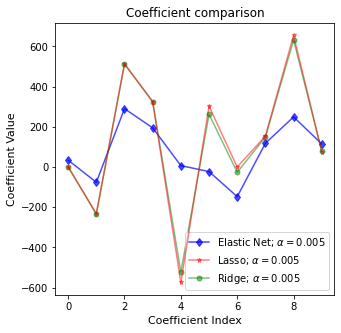

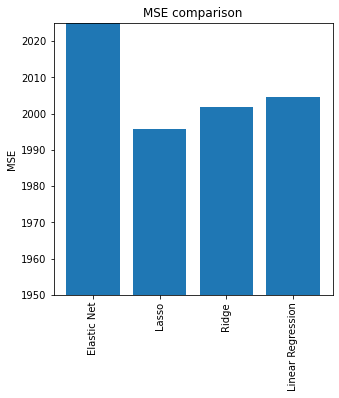

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha = 0.005, l1_ratio=0.5)
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)
elastic_mse = mean_squared_error(y_test,y_pred)

ridge = Ridge(alpha = 0.005)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
ridge_mse =mean_squared_error(y_test,y_pred)

lasso = Lasso(alpha = 0.005)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
lasso_mse =mean_squared_error(y_test,y_pred)

plt.plot(range(10),elastic.coef_,alpha=0.7,marker='d',markersize=6,color='blue',label=r'Elastic Net; $\alpha = 0.005$')
plt.plot(range(10),lasso.coef_,alpha=0.5,marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.005$',zorder=7)
plt.plot(range(10),ridge.coef_,alpha=0.5,marker='o',markersize=5,color='green',label=r'Ridge; $\alpha = 0.005$',zorder=2)
plt.legend()
plt.title("Coefficient comparison")
plt.xlabel('Coefficient Index',fontsize=11)
plt.ylabel('Coefficient Value',fontsize=11)
plt.show()

plt.bar(range(4), (elastic_mse, lasso_mse, ridge_mse, lr_test_score))
plt.title("MSE comparison")
plt.ylabel("MSE")
plt.xticks(range(4), ('Elastic Net', r'Lasso', r'Ridge', 'Linear Regression'), rotation='vertical')
plt.ylim([1950, 2025])
plt.show()

In the above graph, elastic net has higher error than Ridge or Lasso. How can this be possible since it combines the two penalties?

To answer the above question, let's run the code again, being a bit more careful about picking the best hyperparameters. Here is the command you will want; you should be able to cut and paste most of the rest of it from above. (Google sklearn elasticNetCV for details on what the function does. Short answer: uses k-fold CV to select the best hyperparameters.)

In [ ]:
from sklearn.linear_model import ElasticNetCV

elastic = ElasticNetCV(alpha = 0.005, l1_ratio=0.5)
...

You should find that elastic net is somewhere "in-between" Ridge and Lasso in feature shrinkage since it linearly combines L1 and L2 penalty terms. It should be at least as accurate as the best of those two methods.

Source: https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

**Question:** Based on the above results, if you run stepwise linear regression, what feature do you expect would be added first?

**Bonus Question:**  How will test accuracies of each of the different methods change if you add a new set of noise features: 10 times as many new features as you had before, and these features are not correlated with the outcome y?